In [10]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import csv
import matplotlib as mpl

dircsv = '../../../dataset/miniimagenetimages/'
directory = '../../../dataset/miniimagenetimages/images/'

In [5]:
def opencsv(filename):
    file = open(filename)
    csvreader = csv.reader(file)
    header = []
    header = next(csvreader)
    print(header)
    rowstrain = []
    rows = []
    for row in csvreader:
        rows.append(row)
    return rows

In [6]:
test = opencsv(filenametest)
train = opencsv(filenametrain)
val = opencsv(filenameval)

['filename', 'label']
['filename', 'label']
['filename', 'label']


In [7]:
def openimage(test,train,source, cl,title):
    if source=='test':
        src=test
    else:
        src=train
    if type(cl)==int:
        plt.figure(figsize=(5,5))
        idx=int((cl+0.5)*600)+np.random.randint(-100,100)
        filename=src[idx][0]
        im = Image.open(directory +filename)
        plt.title(title)
        plt.imshow(np.array(im))
    else:
        fig = plt.figure(figsize=(8,8))
        spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)
        ax1 = fig.add_subplot(spec[0,0])   #classe 0
        ax2 = fig.add_subplot(spec[0,1])  #classe 1
        ax3 = fig.add_subplot(spec[0,2])  # classe 2
        ax4 = fig.add_subplot(spec[1,0])
        ax5 = fig.add_subplot(spec[1,1])
        L=[ax1,ax2,ax3,ax4,ax5]
        for i,classe in enumerate(cl):
            idx=int((classe+0.5)*600)+np.random.randint(-100,100)
            filename=src[idx][0]
            im = Image.open(directory +filename)
            L[i].imshow(np.array(im))
            L[i].set_title(str(i+1)+';'+str(classe))
    
def get_image(cl):
    if cl<64:
        src=train
    elif cl>=80:
        src = test
        cl-=80
    else:
        src = val
        cl-=64
    idx=int((cl+0.5)*600)+np.random.randint(-100,100)
    filename=src[idx][0]
    im = Image.open(directory +filename)
    return im

In [8]:
file = "../labels/labels_miniINT.txt"
f=open(file,"r")
f.readline()
lines=f.readlines()
result=[]
code = []
for x in lines:
    try:
        result.append(x.split('	')[1][:-1])
        code.append(x.split('	')[0])
    except:
        pass
f.close()

In [11]:
classes = []
for subset in ['train','validation','test']:
    with open(dircsv + subset + ".csv", "r") as f:
                start = 0
                for line in f:
                    if start == 0:
                        start += 1
                    else:
                        splits = line.split(",")
                        fn, c = splits[0], splits[1][:-1]
                        if c not in classes:
                            classes.append(c)

In [12]:
labels = []
for i in range(100):
    cl = classes[i]
    k = code.index(cl)
    labels.append(result[k])

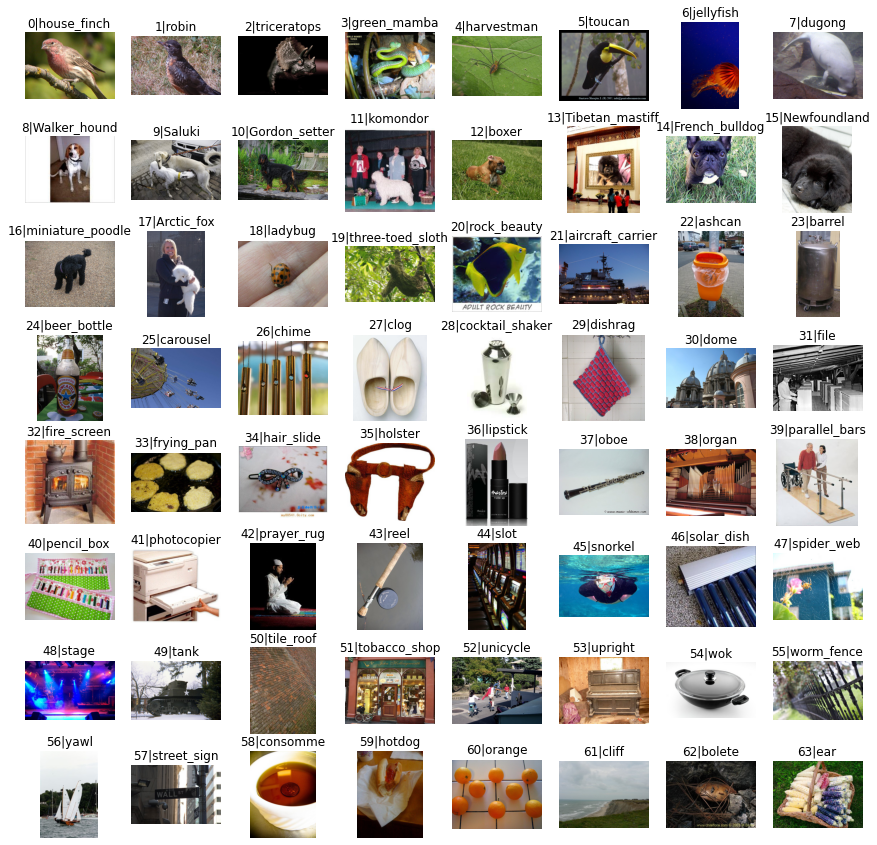

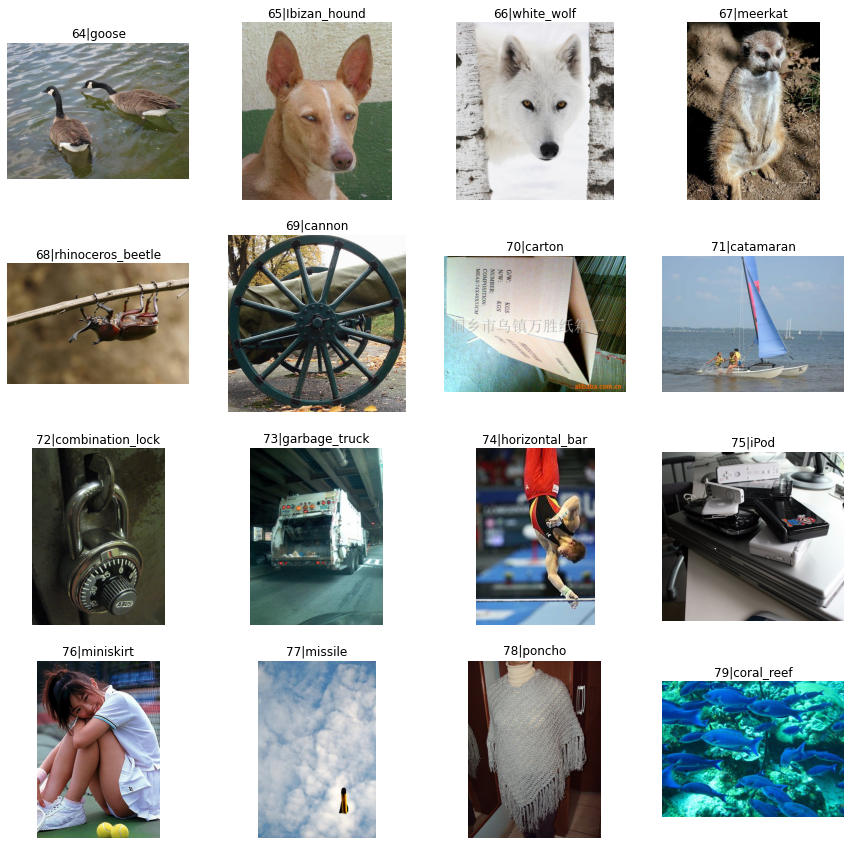

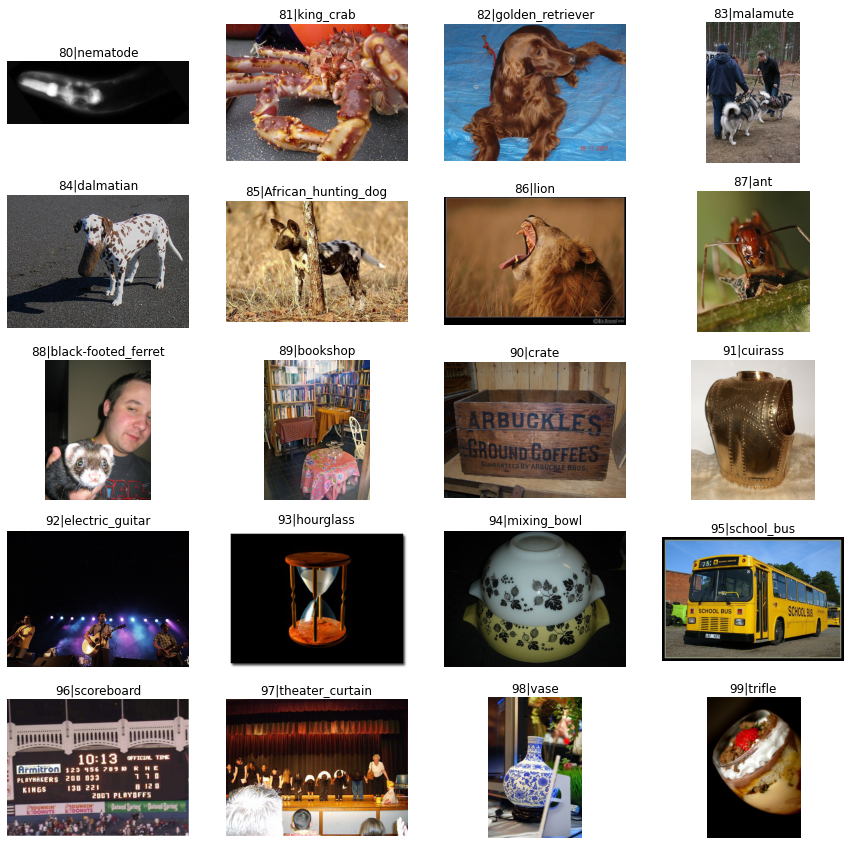

In [13]:
plt.figure(figsize = (15,15))

for i in range(64):
    im = get_image(i)
    plt.subplot(8,8,i+1)
    plt.imshow(im)
    plt.title(str(i)+'|' + labels[i])
    plt.axis('off')
    
plt.figure(figsize = (15,15))

for i in range(16):
    im = get_image(i+64)
    plt.subplot(4,4,i+1)
    plt.imshow(im)
    plt.title(str(i+64)+'|' + labels[i+64])
    plt.axis('off')

plt.figure(figsize = (15,15))

for i in range(20):
    im = get_image(i+80)
    plt.subplot(5,4,i+1)
    plt.imshow(im)
    plt.title(str(i+80)+'|' + labels[i+80])
    plt.axis('off')
  
    